# 데이터 통합 검증 및 요약 노트북

이 노트북은 `player_season_stats_with_vaep_all_leagues_2017-18.csv` 파일의 통합 상태를 검증합니다.

## 검증 항목
1. 데이터 기본 정보 및 구조
2. 리그 이름 통합 상태 확인 (중복/변형 체크)
3. 결측치 분석
4. 아웃라이어 탐지
5. 데이터 일관성 검증
6. 통계 요약


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')

# 출력 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("라이브러리 로드 완료")


라이브러리 로드 완료


## 1. 데이터 로드 및 기본 정보


In [22]:
# 데이터 로드
data_path = Path('../data/player_season_stats_with_vaep_all_leagues_2017-18.csv')
df = pd.read_csv(data_path)

print("=" * 80)
print("데이터 기본 정보")
print("=" * 80)
print(f"총 행 수: {len(df):,}")
print(f"총 컬럼 수: {len(df.columns)}")
print(f"\n컬럼 목록:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n데이터 타입:")
print(df.dtypes)

print(f"\n첫 5행:")
df.head()


데이터 기본 정보
총 행 수: 2,559
총 컬럼 수: 40

컬럼 목록:
   1. playerId
   2. player_name
   3. player
   4. team
   5. nation
   6. league
   7. pos
   8. matches_played
   9. GCA
  10. SCA
  11. assists
  12. blocks
  13. carries
  14. game
  15. goals
  16. interceptions
  17. minutes
  18. npxG
  19. pass_completion_pct
  20. passes_attempted
  21. passes_completed
  22. penalties
  23. penalty_attempts
  24. progressive_carries
  25. progressive_passes
  26. red_cards
  27. shots
  28. shots_on_target
  29. tackles
  30. take_ons_attempted
  31. take_ons_successful
  32. touches
  33. xAG
  34. xG
  35. yellow_cards
  36. season_vaep_total
  37. season_vaep_per90_avg
  38. season_vaep_per_match
  39. season_vaep_per_event
  40. num_events

데이터 타입:
playerId                 float64
player_name               object
player                    object
team                      object
nation                    object
league                    object
pos                       object
matches_played       

,playerId,player_name,player,team,nation,league,pos,matches_played,GCA,SCA,assists,blocks,carries,game,goals,interceptions,minutes,npxG,pass_completion_pct,passes_attempted,passes_completed,penalties,penalty_attempts,progressive_carries,progressive_passes,red_cards,shots,shots_on_target,tackles,take_ons_attempted,take_ons_successful,touches,xAG,xG,yellow_cards,season_vaep_total,season_vaep_per90_avg,season_vaep_per_match,season_vaep_per_event,num_events
0,40810.0,Neymar,Neymar,Paris Saint-Germain,BRA,FRA-Ligue 1,LW,25.0,34.0,176.0,13.0,4.0,1301.0,20.0,19.0,5.0,1786.0,11.6,1526.8,1452.0,1106.0,4.0,4.0,152.0,204.0,1.0,86.0,36.0,20.0,212.0,142.0,1750.0,11.4,14.8,6.0,34.385206,1.375408,1.375408,0.008114,4238.0
1,8317.0,David Silva,David Silva,Manchester City,ESP,ENG-Premier League,LM,37.0,20.0,141.0,11.0,28.0,1872.0,29.0,9.0,18.0,2430.0,7.3,2465.8,2520.0,2183.0,0.0,0.0,158.0,337.0,0.0,54.0,20.0,32.0,49.0,38.0,2718.0,8.2,7.3,5.0,46.105510,1.246095,1.246095,0.007171,6429.0
2,21315.0,Jorginho,Jorginho,Napoli,ITA,ITA-Serie A,CM,33.0,12.0,100.0,4.0,32.0,2003.0,33.0,2.0,50.0,2650.0,0.3,2915.7,3229.0,2863.0,1.0,2.0,36.0,398.0,0.0,15.0,3.0,62.0,18.0,12.0,3456.0,4.1,2.0,5.0,40.821715,1.237022,1.237022,0.006105,6687.0
3,70086.0,Nicolás Otamendi,Nicolás Otamendi,Manchester City,ARG,ENG-Premier League,CB,38.0,1.0,36.0,0.0,21.0,2428.0,34.0,4.0,48.0,2967.0,3.0,3114.5,3082.0,2829.0,0.0,0.0,92.0,212.0,0.0,32.0,10.0,58.0,7.0,5.0,3407.0,1.0,3.0,9.0,46.020520,1.211066,1.211066,0.006252,7361.0
4,25849.0,Faouzi Ghoulam,Faouzi Ghoulam,Napoli,ALG,ITA-Serie A,LB,11.0,6.0,42.0,3.0,10.0,617.0,11.0,2.0,15.0,986.0,0.7,936.6,984.0,838.0,0.0,0.0,54.0,99.0,0.0,10.0,5.0,8.0,11.0,9.0,1067.0,2.0,0.7,1.0,13.278335,1.207121,1.207121,0.006659,1994.0


## 2. 리그 이름 통합 상태 확인


In [23]:
print("=" * 80)
print("리그 이름 분석")
print("=" * 80)

# 리그별 통계
league_counts = df['league'].value_counts().sort_index()
print(f"\n고유 리그 수: {df['league'].nunique()}")
print(f"\n리그별 선수 수:")
for league, count in league_counts.items():
    print(f"  {league:40s}: {count:5,}명")

# 리그 이름 패턴 분석 (EPL, Premier League 등 중복 체크)
print("\n" + "=" * 80)
print("리그 이름 패턴 분석 (중복/변형 체크)")
print("=" * 80)

# English Premier League 관련 체크
english_leagues = df[df['league'].str.contains('English|Premier|EPL', case=False, na=False)]
if len(english_leagues) > 0:
    print("\n⚠️ English/Premier League 관련 리그:")
    print(english_leagues['league'].value_counts())

# 리그 이름 정규화 확인
league_normalized = df['league'].str.strip().str.lower()
league_variations = {}
for league in df['league'].unique():
    normalized = league.strip().lower()
    if normalized not in league_variations:
        league_variations[normalized] = []
    league_variations[normalized].append(league)

# 중복/변형 발견
duplicates_found = {k: v for k, v in league_variations.items() if len(v) > 1}
if duplicates_found:
    print("\n⚠️ 리그 이름 중복/변형 발견:")
    for normalized, variations in duplicates_found.items():
        print(f"  '{normalized}': {variations}")
else:
    print("\n✓ 리그 이름 중복 없음")


리그 이름 분석

고유 리그 수: 5

리그별 선수 수:
  ENG-Premier League                      :   511명
  ESP-La Liga                             :   545명
  FRA-Ligue 1                             :   529명
  GER-Bundesliga                          :   463명
  ITA-Serie A                             :   511명

리그 이름 패턴 분석 (중복/변형 체크)

⚠️ English/Premier League 관련 리그:
ENG-Premier League    511
Name: league, dtype: int64

✓ 리그 이름 중복 없음


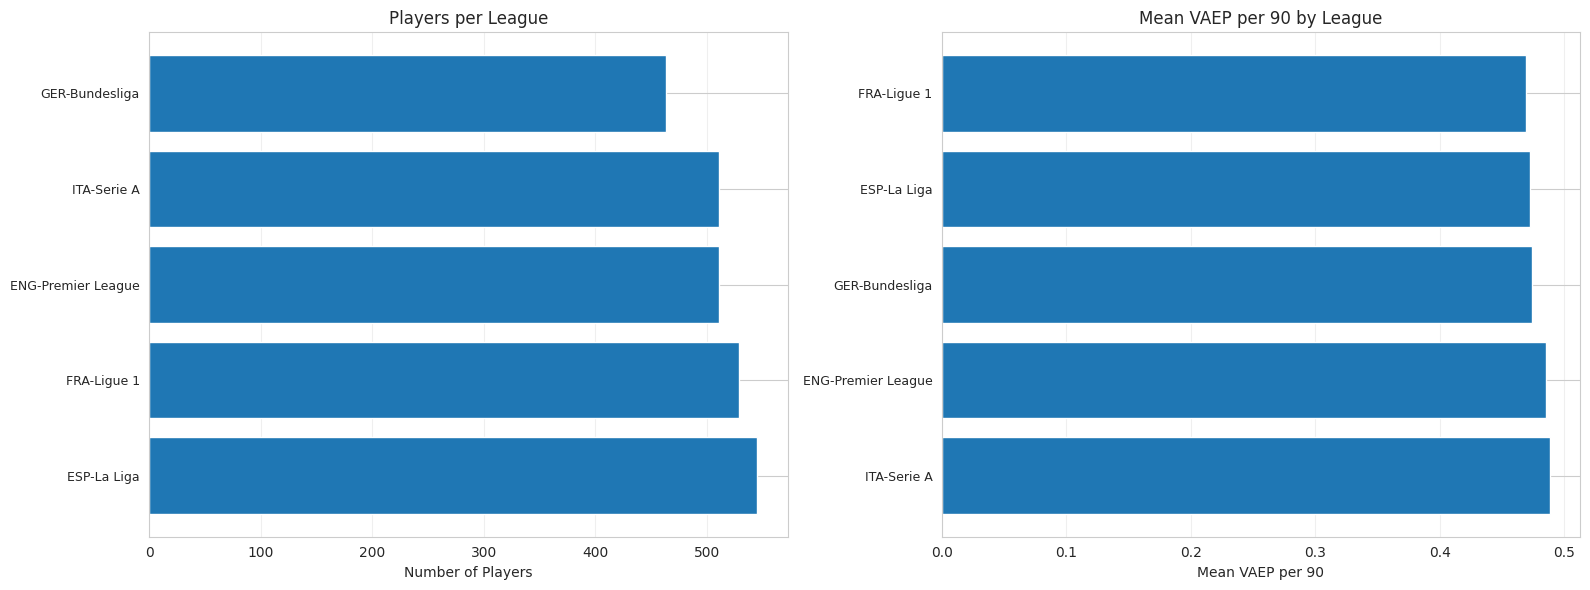

In [24]:
# 리그별 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 리그별 선수 수
league_counts_sorted = league_counts.sort_values(ascending=False)
axes[0].barh(range(len(league_counts_sorted)), league_counts_sorted.values)
axes[0].set_yticks(range(len(league_counts_sorted)))
axes[0].set_yticklabels(league_counts_sorted.index, fontsize=9)
axes[0].set_xlabel('Number of Players')
axes[0].set_title('Players per League')
axes[0].grid(True, alpha=0.3, axis='x')

# 리그별 평균 VAEP per 90
if 'season_vaep_per90_avg' in df.columns:
    league_vaep = df.groupby('league')['season_vaep_per90_avg'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    axes[1].barh(range(len(league_vaep)), league_vaep['mean'].values)
    axes[1].set_yticks(range(len(league_vaep)))
    axes[1].set_yticklabels(league_vaep.index, fontsize=9)
    axes[1].set_xlabel('Mean VAEP per 90')
    axes[1].set_title('Mean VAEP per 90 by League')
    axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 3. 결측치 분석


결측치 분석

결측치가 있는 컬럼: 36개
                       Missing Count  Missing Percentage
player                           453           17.702227
passes_completed                 453           17.702227
yellow_cards                     453           17.702227
xG                               453           17.702227
xAG                              453           17.702227
touches                          453           17.702227
take_ons_successful              453           17.702227
take_ons_attempted               453           17.702227
tackles                          453           17.702227
shots_on_target                  453           17.702227
shots                            453           17.702227
red_cards                        453           17.702227
progressive_passes               453           17.702227
progressive_carries              453           17.702227
team                             453           17.702227
penalties                        453           17.702227
penalty

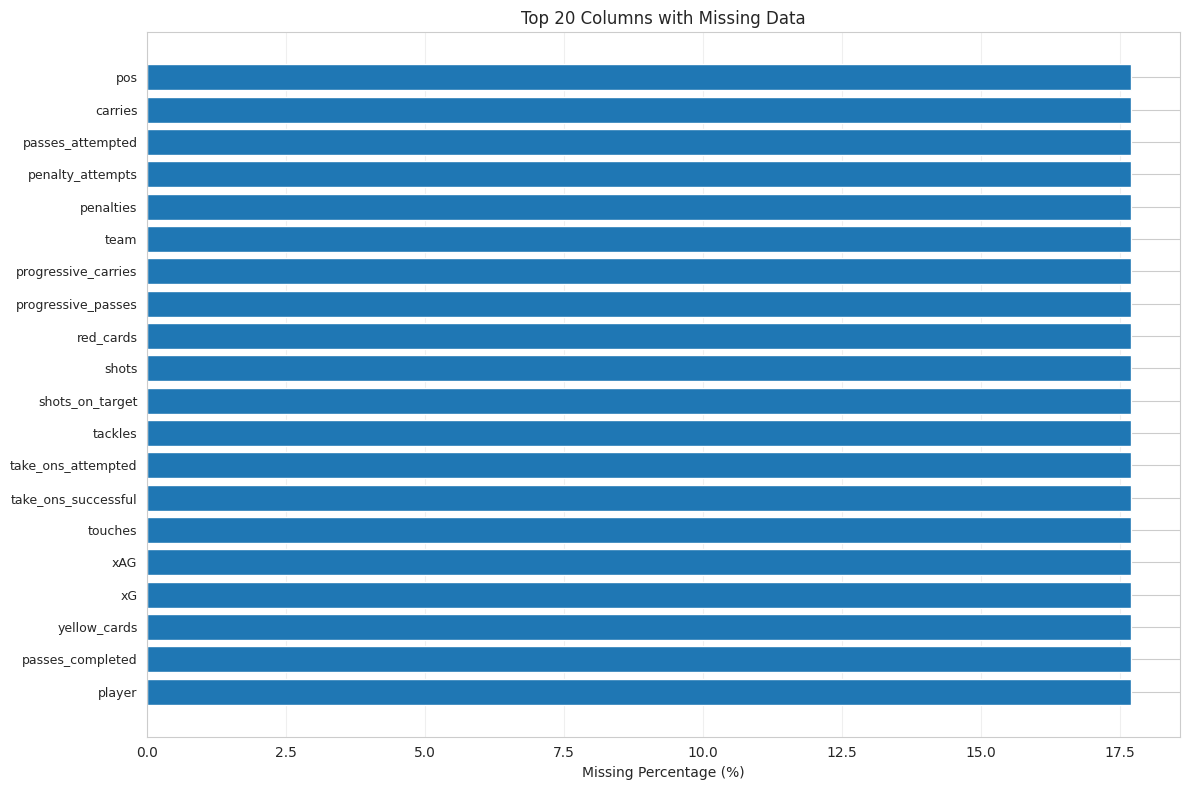

In [25]:
print("=" * 80)
print("결측치 분석")
print("=" * 80)

missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n결측치가 있는 컬럼: {len(missing_df)}개")
    print(missing_df.to_string())
    
    # 결측치 시각화
    fig, ax = plt.subplots(figsize=(12, 8))
    top_missing = missing_df.head(20)
    ax.barh(range(len(top_missing)), top_missing['Missing Percentage'].values)
    ax.set_yticks(range(len(top_missing)))
    ax.set_yticklabels(top_missing.index, fontsize=9)
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_title('Top 20 Columns with Missing Data')
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ 결측치 없음")


## 4. 아웃라이어 탐지


In [26]:
print("=" * 80)
print("아웃라이어 탐지 (IQR 방법)")
print("=" * 80)

# 주요 수치형 컬럼 선택
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# VAEP 관련 컬럼과 주요 통계 컬럼만 선택
key_cols = [col for col in numeric_cols if any(keyword in col.lower() for keyword in 
            ['vaep', 'matches', 'goals', 'assists', 'xg', 'xag', 'gca', 'sca', 'minutes', 'events'])]

outliers_summary = {}

for col in key_cols:
    if df[col].notna().sum() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if len(outliers) > 0:
            outliers_summary[col] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(df)) * 100,
                'min': df[col].min(),
                'max': df[col].max(),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }

if outliers_summary:
    print(f"\n아웃라이어가 발견된 컬럼: {len(outliers_summary)}개")
    outliers_df = pd.DataFrame(outliers_summary).T
    outliers_df = outliers_df.sort_values('count', ascending=False)
    print(outliers_df.to_string())
else:
    print("\n✓ 아웃라이어 없음 (IQR 방법)")


아웃라이어 탐지 (IQR 방법)

아웃라이어가 발견된 컬럼: 13개
                       count  percentage         min          max  lower_bound  upper_bound
xG                     199.0    7.776475    0.000000    28.200000    -3.300000     6.300000
npxG                   186.0    7.268464    0.000000    23.900000    -3.000000     5.800000
goals                  169.0    6.604142    0.000000    34.000000    -4.500000     7.500000
assists                148.0    5.783509    0.000000    16.000000    -3.000000     5.000000
season_vaep_per_event  135.0    5.275498    0.005356     0.025431     0.004923     0.008409
xAG                    119.0    4.650254    0.000000    14.600000    -2.800000     5.200000
GCA                    107.0    4.181321    0.000000    43.000000    -6.500000    13.500000
SCA                     90.0    3.516999    0.000000   265.000000   -49.500000   114.500000
num_events              28.0    1.094177    1.000000  8510.000000 -2582.250000  5607.750000
season_vaep_total       23.0    0.898789  

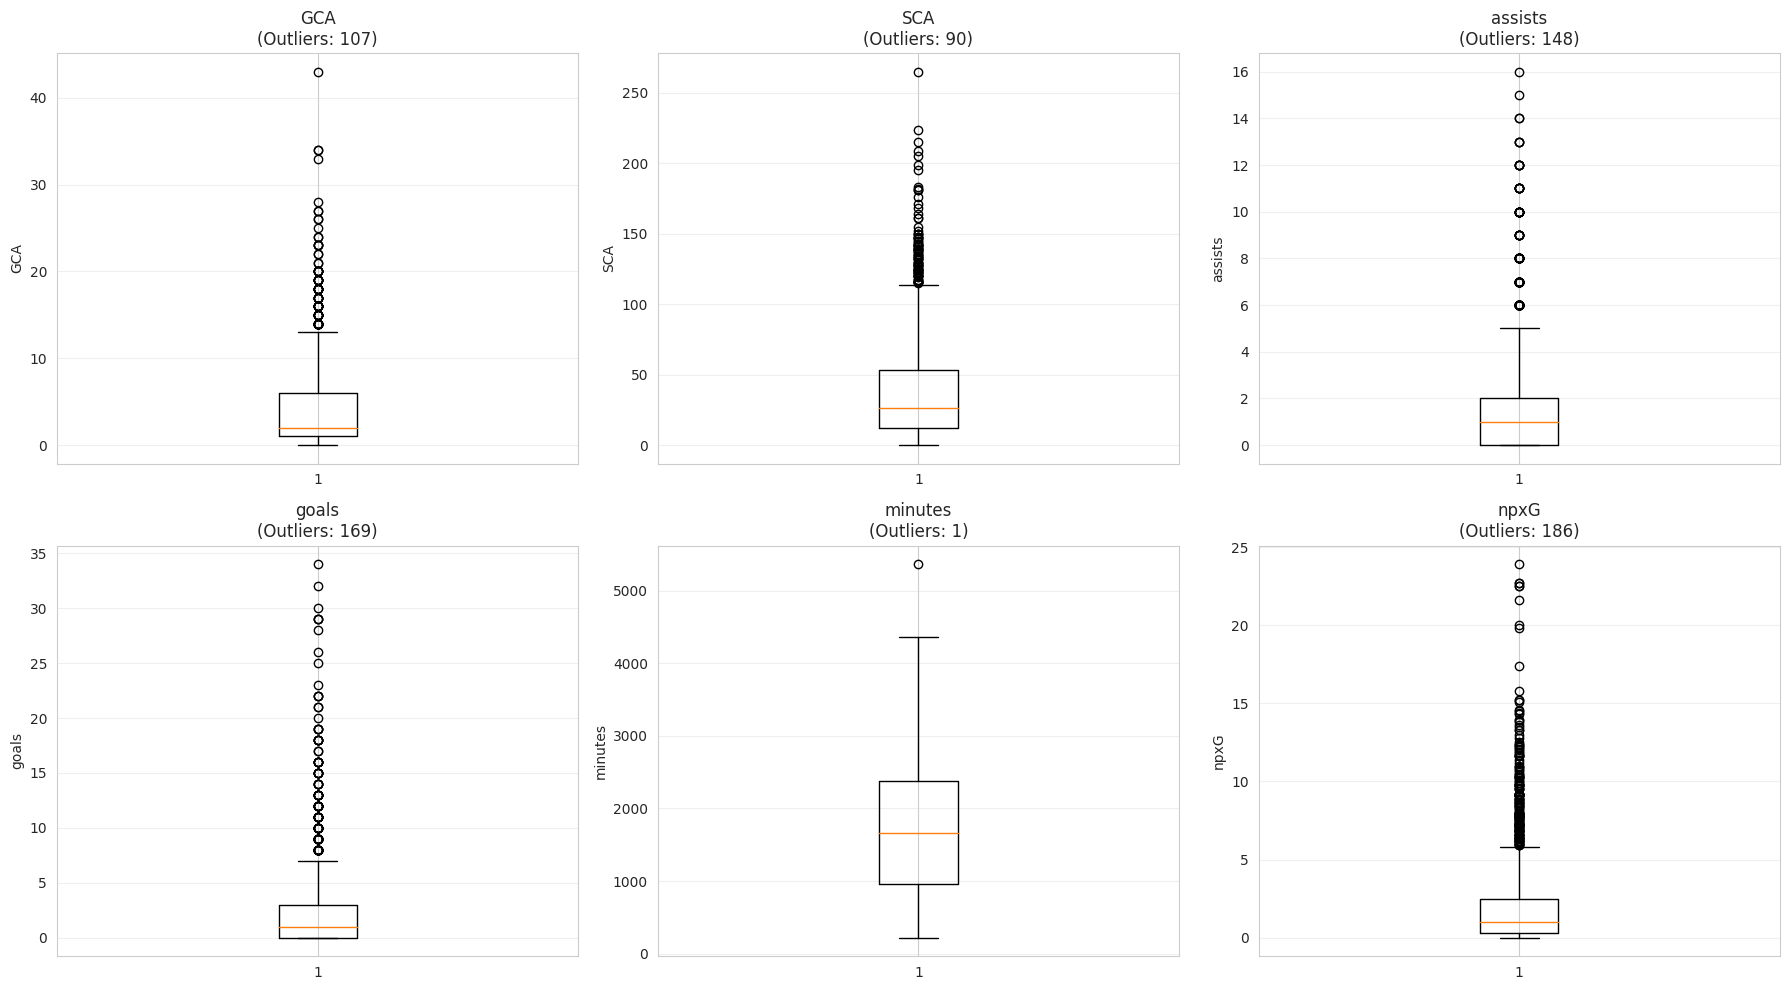

In [27]:
# 주요 컬럼의 아웃라이어 시각화
if outliers_summary:
    key_outlier_cols = list(outliers_summary.keys())[:6]  # 상위 6개만
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(key_outlier_cols):
        if idx < len(axes):
            data = df[col].dropna()
            axes[idx].boxplot(data, vert=True)
            axes[idx].set_ylabel(col)
            axes[idx].set_title(f'{col}\n(Outliers: {outliers_summary[col]["count"]})')
            axes[idx].grid(True, alpha=0.3, axis='y')
    
    # 빈 subplot 제거
    for idx in range(len(key_outlier_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()


## 5. 데이터 일관성 검증


In [28]:
print("=" * 80)
print("데이터 일관성 검증")
print("=" * 80)

# 1. 중복 행 체크
duplicates = df.duplicated().sum()
print(f"\n1. 중복 행: {duplicates}개")
if duplicates > 0:
    print("   ⚠️ 중복 행 발견")
    print(df[df.duplicated(keep=False)].head())
else:
    print("   ✓ 중복 행 없음")

# 2. 선수 ID 중복 체크 (같은 선수가 여러 리그에 있는지)
player_id_duplicates = df.groupby('playerId').size()
multiple_leagues = player_id_duplicates[player_id_duplicates > 1]
print(f"\n2. 여러 리그에 출전한 선수: {len(multiple_leagues):,}명")
if len(multiple_leagues) > 0:
    print(f"   최대 출전 리그 수: {multiple_leagues.max()}")
    print(f"   평균 출전 리그 수: {multiple_leagues.mean():.2f}")

# 3. 음수 값 체크 (불가능한 값)
negative_cols = []
for col in numeric_cols:
    if df[col].notna().any():
        if (df[col] < 0).any():
            negative_count = (df[col] < 0).sum()
            # VAEP는 음수 가능, 다른 통계는 음수 불가능
            if 'vaep' not in col.lower():
                negative_cols.append((col, negative_count))

if negative_cols:
    print(f"\n3. ⚠️ 음수 값이 있는 컬럼 (VAEP 제외):")
    for col, count in negative_cols:
        print(f"   {col}: {count}개")
else:
    print(f"\n3. ✓ 음수 값 없음 (VAEP 제외)")

# 4. 범위 체크 (예: 경기 수가 비정상적으로 많은 경우)
if 'matches_played' in df.columns:
    high_matches = df[df['matches_played'] > 60]
    if len(high_matches) > 0:
        print(f"\n4. ⚠️ 경기 수 60회 초과 선수: {len(high_matches)}명")
        print(high_matches[['playerId', 'player_name', 'league', 'matches_played']].head())
    else:
        print(f"\n4. ✓ 경기 수 정상 범위")

# 5. VAEP 값 범위 체크
if 'season_vaep_per90_avg' in df.columns:
    vaep_stats = df['season_vaep_per90_avg'].describe()
    print(f"\n5. VAEP per 90 통계:")
    print(f"   Min: {vaep_stats['min']:.4f}")
    print(f"   Max: {vaep_stats['max']:.4f}")
    print(f"   Mean: {vaep_stats['mean']:.4f}")
    print(f"   Median: {vaep_stats['50%']:.4f}")


데이터 일관성 검증

1. 중복 행: 0개
   ✓ 중복 행 없음

2. 여러 리그에 출전한 선수: 2명
   최대 출전 리그 수: 2
   평균 출전 리그 수: 2.00

3. ✓ 음수 값 없음 (VAEP 제외)

4. ✓ 경기 수 정상 범위

5. VAEP per 90 통계:
   Min: 0.0058
   Max: 1.3754
   Mean: 0.4781
   Median: 0.4799


## 6. 통계 요약


In [29]:
print("=" * 80)
print("전체 데이터 통계 요약")
print("=" * 80)

# 기본 통계
print(f"\n1. 기본 정보:")
print(f"   총 선수-리그 조합: {len(df):,}")
print(f"   고유 선수 수: {df['playerId'].nunique():,}")
print(f"   고유 리그 수: {df['league'].nunique()}")
print(f"   고유 팀 수: {df['team'].nunique():,}")
print(f"   고유 포지션 수: {df['pos'].nunique()}")

# 리그별 요약
print(f"\n2. 리그별 요약:")
league_summary = df.groupby('league').agg({
    'playerId': 'count',
    'matches_played': 'mean',
    'season_vaep_per90_avg': 'mean' if 'season_vaep_per90_avg' in df.columns else lambda x: 0
}).round(2)
league_summary.columns = ['Players', 'Avg Matches', 'Avg VAEP per 90']
print(league_summary.to_string())

# 포지션별 요약
if 'pos' in df.columns:
    print(f"\n3. 포지션별 요약:")
    pos_summary = df.groupby('pos').agg({
        'playerId': 'count',
        'matches_played': 'mean',
        'season_vaep_per90_avg': 'mean' if 'season_vaep_per90_avg' in df.columns else lambda x: 0
    }).round(2)
    pos_summary.columns = ['Players', 'Avg Matches', 'Avg VAEP per 90']
    pos_summary = pos_summary.sort_values('Players', ascending=False)
    print(pos_summary.to_string())

# 주요 통계 컬럼 요약
print(f"\n4. 주요 통계 요약:")
key_stats_cols = ['matches_played', 'goals', 'assists', 'xG', 'xAG', 'GCA', 'SCA']
available_stats = [col for col in key_stats_cols if col in df.columns]
if available_stats:
    stats_summary = df[available_stats].describe()
    print(stats_summary.to_string())

# VAEP 통계
if 'season_vaep_per90_avg' in df.columns:
    print(f"\n5. VAEP 통계 요약:")
    vaep_cols = [col for col in df.columns if 'vaep' in col.lower()]
    vaep_summary = df[vaep_cols].describe()
    print(vaep_summary.to_string())


전체 데이터 통계 요약

1. 기본 정보:
   총 선수-리그 조합: 2,559
   고유 선수 수: 2,557
   고유 리그 수: 5
   고유 팀 수: 98
   고유 포지션 수: 20

2. 리그별 요약:
                    Players  Avg Matches  Avg VAEP per 90
league                                                   
ENG-Premier League      511        22.31             0.49
ESP-La Liga             545        20.11             0.47
FRA-Ligue 1             529        20.23             0.47
GER-Bundesliga          463        18.68             0.47
ITA-Serie A             511        20.77             0.49

3. 포지션별 요약:
       Players  Avg Matches  Avg VAEP per 90
pos                                         
CB         396        22.36             0.62
FW         322        24.39             0.34
CM         277        23.43             0.53
LB         169        20.89             0.64
RB         155        22.57             0.62
GK         137        26.72             0.38
DM         117        23.07             0.56
AM         101        25.10             0.52
LM         1

In [30]:
# 최종 검증 요약
print("=" * 80)
print("최종 검증 요약")
print("=" * 80)

checks = {
    '리그 이름 중복': '✓ 통과' if not duplicates_found else '⚠️ 중복 발견',
    '결측치': f"✓ {len(missing_df)}개 컬럼에 결측치" if len(missing_df) > 0 else '✓ 결측치 없음',
    '아웃라이어': f"⚠️ {len(outliers_summary)}개 컬럼에 아웃라이어" if outliers_summary else '✓ 아웃라이어 없음',
    '중복 행': f"⚠️ {duplicates}개 중복 행" if duplicates > 0 else '✓ 중복 행 없음',
    '데이터 일관성': '✓ 통과'
}

for check, result in checks.items():
    print(f"{check:20s}: {result}")

print("\n" + "=" * 80)
print("검증 완료")
print("=" * 80)


최종 검증 요약
리그 이름 중복            : ✓ 통과
결측치                 : ✓ 36개 컬럼에 결측치
아웃라이어               : ⚠️ 13개 컬럼에 아웃라이어
중복 행                : ✓ 중복 행 없음
데이터 일관성             : ✓ 통과

검증 완료


## 7. 데이터 통합 상태 검증


In [31]:
# 통합 결과 상세 요약
print("=" * 80)
print("통합 결과 요약")
print("=" * 80)

print(f"\n1. 기본 통계:")
print(f"   - 총 행 수: {len(df):,} 행")
print(f"   - 총 선수 수: {df['playerId'].nunique():,} 명")
print(f"   - 총 컬럼 수: {len(df.columns)} 개")

print(f"\n2. 데이터 통합 현황:")
vaep_only = df[(df['season_vaep_per90_avg'].notna()) & (df['xG'].isna())].shape[0]
stats_only = df[(df['xG'].notna()) & (df['season_vaep_per90_avg'].isna())].shape[0]
both = df[(df['season_vaep_per90_avg'].notna()) & (df['xG'].notna())].shape[0]

print(f"   - VAEP 데이터만 있는 선수: {vaep_only:,} 명")
print(f"   - 리그 통계만 있는 선수: {stats_only:,} 명")
print(f"   - 양쪽 데이터가 모두 있는 선수: {both:,} 명")

print(f"\n3. 결측치 현황:")
print(f"   - 전체 결측치 수: {df.isna().sum().sum():,} 개")
print(f"\n   컬럼별 결측치:")
missing_info = df.isna().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)
for col, count in missing_info.items():
    pct = (count / len(df)) * 100
    print(f"     - {col}: {count:,} 개 ({pct:.1f}%)")


통합 결과 요약

1. 기본 통계:
   - 총 행 수: 2,559 행
   - 총 선수 수: 2,557 명
   - 총 컬럼 수: 40 개

2. 데이터 통합 현황:
   - VAEP 데이터만 있는 선수: 453 명
   - 리그 통계만 있는 선수: 5 명
   - 양쪽 데이터가 모두 있는 선수: 2,101 명

3. 결측치 현황:
   - 전체 결측치 수: 13,620 개

   컬럼별 결측치:
     - player: 453 개 (17.7%)
     - passes_completed: 453 개 (17.7%)
     - yellow_cards: 453 개 (17.7%)
     - xG: 453 개 (17.7%)
     - xAG: 453 개 (17.7%)
     - touches: 453 개 (17.7%)
     - take_ons_successful: 453 개 (17.7%)
     - take_ons_attempted: 453 개 (17.7%)
     - tackles: 453 개 (17.7%)
     - shots_on_target: 453 개 (17.7%)
     - shots: 453 개 (17.7%)
     - red_cards: 453 개 (17.7%)
     - progressive_passes: 453 개 (17.7%)
     - progressive_carries: 453 개 (17.7%)
     - team: 453 개 (17.7%)
     - penalties: 453 개 (17.7%)
     - penalty_attempts: 453 개 (17.7%)
     - passes_attempted: 453 개 (17.7%)
     - carries: 453 개 (17.7%)
     - pos: 453 개 (17.7%)
     - GCA: 453 개 (17.7%)
     - SCA: 453 개 (17.7%)
     - pass_completion_pct: 453 개 (17.7%)
     - blo

## 8. 한 쪽 데이터에만 존재하는 선수 목록


In [32]:
# 한 쪽 데이터에만 존재하는 선수 목록 출력
print("=" * 80)
print("1. VAEP 데이터만 있는 선수 (리그 통계 없음)")
print("=" * 80)

# VAEP 데이터만 있는 선수
vaep_only = df[
    (df['season_vaep_per90_avg'].notna()) & 
    (df['xG'].isna())
].copy()

if len(vaep_only) > 0:
    vaep_only = vaep_only.sort_values('season_vaep_per90_avg', ascending=False)
    
    print(f"\n총 {len(vaep_only)}명\n")
    
    # 전체 목록 출력
    for idx, (_, row) in enumerate(vaep_only.iterrows(), 1):
        nation = row.get('nation', 'N/A') if pd.notna(row.get('nation')) else 'N/A'
        matches = int(row['matches_played']) if pd.notna(row['matches_played']) else 'N/A'
        role = row.get('pos', 'N/A') if pd.notna(row.get('pos')) else 'N/A'
        vaep = f"{row['season_vaep_per90_avg']:.6f}" if pd.notna(row['season_vaep_per90_avg']) else 'N/A'
        player_name = row.get('player_name', 'N/A')
        
        print(f"{idx:3d}. {player_name:40s} | 국적: {str(nation):5s} | 경기: {str(matches):3s} | 포지션: {str(role):5s} | VAEP/90: {vaep}")
else:
    print("해당 조건의 선수가 없습니다.")

print("\n" + "=" * 80)
print("2. 리그 통계만 있는 선수 (VAEP 데이터 없음)")
print("=" * 80)

# 리그 통계만 있는 선수
stats_only = df[
    (df['xG'].notna()) & 
    (df['season_vaep_per90_avg'].isna())
].copy()

if len(stats_only) > 0:
    # xG 기준으로 정렬
    stats_only = stats_only.sort_values('xG', ascending=False)
    
    print(f"\n총 {len(stats_only)}명\n")
    
    # 전체 목록 출력
    for idx, (_, row) in enumerate(stats_only.iterrows(), 1):
        team = row.get('team', 'N/A') if pd.notna(row.get('team')) else 'N/A'
        nation = row.get('nation', 'N/A') if pd.notna(row.get('nation')) else 'N/A'
        games = int(row.get('games', row.get('matches_played', 'N/A'))) if pd.notna(row.get('games', row.get('matches_played'))) else 'N/A'
        role = row.get('pos', 'N/A') if pd.notna(row.get('pos')) else 'N/A'
        xG = float(row.get('xG', 0)) if pd.notna(row.get('xG', 0)) else 0
        xAG = float(row.get('xAG', 0)) if pd.notna(row.get('xAG', 0)) else 0
        player_name = row.get('player_name', row.get('player', 'N/A'))
        
        print(f"{idx:3d}. {player_name:40s} | 팀: {str(team):30s} | 국적: {str(nation):5s} | 경기: {str(games):3s} | 포지션: {str(role):5s} | xG: {xG:.2f} | xAG: {xAG:.2f}")
else:
    print("해당 조건의 선수가 없습니다.")

print("\n" + "=" * 80)
print("요약")
print("=" * 80)
print(f"VAEP 데이터만 있는 선수: {len(vaep_only)}명")
print(f"리그 통계만 있는 선수: {len(stats_only)}명")
print(f"양쪽 데이터가 모두 있는 선수: {len(df[(df['season_vaep_per90_avg'].notna()) & (df['xG'].notna())])}명")


1. VAEP 데이터만 있는 선수 (리그 통계 없음)

총 453명

  1. Kyle Walker                              | 국적: XEN   | 경기: 40  | 포지션: N/A   | VAEP/90: 1.037307
  2. Anthony Ribelin                          | 국적: FRA   | 경기: 1   | 포지션: N/A   | VAEP/90: 1.024600
  3. Medhi Amine El                           | 국적: FRA   | 경기: 22  | 포지션: N/A   | VAEP/90: 0.963317
  4. Joël Andre Job                           | 국적: DEU   | 경기: 24  | 포지션: N/A   | VAEP/90: 0.919241
  5. Sergej Milinković                        | 국적: ESP   | 경기: 38  | 포지션: N/A   | VAEP/90: 0.890822
  6. Marcelo Antônio Guedes                   | 국적: BRA   | 경기: 35  | 포지션: N/A   | VAEP/90: 0.889754
  7. Jorge Resurrección                       | 국적: ESP   | 경기: 39  | 포지션: N/A   | VAEP/90: 0.888613
  8. Abdoulaye Doucouré                       | 국적: FRA   | 경기: 37  | 포지션: N/A   | VAEP/90: 0.862406
  9. Jérémy Pied                              | 국적: FRA   | 경기: 2   | 포지션: N/A   | VAEP/90: 0.856560
 10. Danilo Luiz da                           | 국적: 

## 9. 유사도 기반으로 통합된 선수 이름 비교


In [33]:
# 유사도 기반으로 통합된 선수들의 이름 비교
# player_name (통합된 이름)과 player (stats 이름)이 다른 경우를 찾아서 출력

from difflib import SequenceMatcher

def normalize_name(name):
    """이름 정규화 (대소문자, 공백, 특수문자 처리)"""
    if pd.isna(name):
        return ""
    name = str(name).strip()
    # 공백 정규화
    name = ' '.join(name.split())
    return name.lower()

def calculate_name_similarity(name1, name2):
    """이름 유사도 계산 (0-1 사이 값)"""
    if not name1 or not name2:
        return 0.0
    name1_norm = normalize_name(name1)
    name2_norm = normalize_name(name2)
    return SequenceMatcher(None, name1_norm, name2_norm).ratio()

# 양쪽 데이터가 모두 있는 선수 중에서 이름이 다른 경우 찾기
both_data = df[
    (df['season_vaep_per90_avg'].notna()) & 
    (df['xG'].notna())
].copy()

# player_name과 player가 모두 있는 경우
both_data = both_data[
    both_data['player_name'].notna() & 
    both_data['player'].notna()
].copy()

# 이름이 다른 선수 찾기 (유사도 기반으로 통합된 선수)
name_different = []
for idx, row in both_data.iterrows():
    player_name = normalize_name(row['player_name'])
    player = normalize_name(row['player'])
    
    # 이름이 완전히 일치하지 않는 경우
    if player_name != player:
        similarity = calculate_name_similarity(row['player_name'], row['player'])
        # 통합된 이름은 player_name (VAEP 데이터의 이름을 사용)
        # VAEP 이름도 player_name (통합 시 VAEP 이름을 우선 사용)
        # Stats 이름은 player (리그 통계 데이터의 이름)
        name_different.append({
            'playerId': row['playerId'],
            '통합된_이름': row['player_name'],  # 통합된 이름 (VAEP 이름 사용)
            'VAEP_이름': row['player_name'],    # VAEP 이름 (통합된 이름과 동일)
            'Stats_이름': row['player'],        # Stats 이름 (리그 통계 이름)
            '이름_유사도': similarity,
            '국적': row.get('nation', 'N/A'),
            '경기수': row.get('matches_played', 'N/A'),
            'VAEP_per90': row.get('season_vaep_per90_avg', 'N/A'),
            'xG': row.get('xG', 'N/A')
        })

if len(name_different) > 0:
    name_diff_df = pd.DataFrame(name_different)
    name_diff_df = name_diff_df.sort_values('이름_유사도', ascending=True)  # 유사도 낮은 순으로 정렬
    
    print("=" * 80)
    print(f"유사도 기반으로 통합된 선수 이름 비교 ({len(name_diff_df)}명)")
    print("=" * 80)
    print("(이름이 완벽히 일치하지 않아 유사도 기반으로 통합된 선수들)")
    print("\n형식: 통합된 이름 | VAEP 이름 | Stats 이름")
    print("-" * 80)
    
    for idx, (_, row) in enumerate(name_diff_df.iterrows(), 1):
        print(f"{idx:4d}. {row['통합된_이름']:40s} | {row['VAEP_이름']:40s} | {row['Stats_이름']:40s}")
        print(f"      유사도: {row['이름_유사도']:.4f} | 국적: {str(row['국적']):5s} | 경기: {str(row['경기수']):3s} | VAEP/90: {row['VAEP_per90']:.6f if pd.notna(row['VAEP_per90']) else 'N/A'} | xG: {row['xG']:.2f if pd.notna(row['xG']) else 'N/A'}")
    
    print("\n" + "=" * 80)
    print("요약")
    print("=" * 80)
    print(f"총 {len(name_diff_df)}명의 선수가 유사도 기반으로 통합됨")
    print(f"평균 이름 유사도: {name_diff_df['이름_유사도'].mean():.4f}")
    print(f"최소 이름 유사도: {name_diff_df['이름_유사도'].min():.4f}")
    print(f"최대 이름 유사도: {name_diff_df['이름_유사도'].max():.4f}")
    
    # 유사도 구간별 분포
    print(f"\n이름 유사도 구간별 분포:")
    bins = [0.0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    labels = ['0.0-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
    name_diff_df['유사도_구간'] = pd.cut(name_diff_df['이름_유사도'], bins=bins, labels=labels, include_lowest=True)
    similarity_dist = name_diff_df['유사도_구간'].value_counts().sort_index()
    for range_label, count in similarity_dist.items():
        print(f"  {range_label}: {count}명")
else:
    print("=" * 80)
    print("유사도 기반으로 통합된 선수가 없습니다.")
    print("(모든 선수의 이름이 완벽히 일치합니다)")
    print("=" * 80)


유사도 기반으로 통합된 선수가 없습니다.
(모든 선수의 이름이 완벽히 일치합니다)
